In [1]:
import pandas as pd
# from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# from tensorflow.keras.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
import numpy as np
from pandas.tseries.offsets import DateOffset

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('Aqi_new.csv')

In [3]:
df

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF,Station
0,01-01-2020 00:00,02-01-2020 00:00,54.66,129.15,33.13,33.83,66.98,None,12.36,2.55,...,65.36,0.09,125.67,114.69,769.84,0,None,None,0.0,bandra
1,02-01-2020 00:00,03-01-2020 00:00,60.25,117.23,17.77,28.03,45.81,None,14.1,2.38,...,71.28,0.08,109.09,112.69,771.42,0,None,None,0.0,bandra
2,03-01-2020 00:00,04-01-2020 00:00,55.67,100.72,21.19,25.7,46.89,None,13.2,2.22,...,68.72,0.12,127.71,103.66,770.8,0,None,None,0.0,bandra
3,04-01-2020 00:00,05-01-2020 00:00,31.42,49.3,16.71,23.64,40.35,None,4.21,2.03,...,64.46,0.1,113.06,107.06,769.49,0,None,None,0.0,bandra
4,05-01-2020 00:00,06-01-2020 00:00,44.59,62.4,25.56,30.41,55.98,None,3.9,2.43,...,64.61,0.26,127.22,106.37,768.44,0,None,None,0.0,bandra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,28-12-2022 00:00,29-12-2022 00:00,67.85,181.56,39.88,3.96,30.16,12.05,27.71,1.38,...,77.73,0.94,179.72,154.85,1014.31,None,23.73,None,0.0,worli
6578,29-12-2022 00:00,30-12-2022 00:00,74.86,204.98,64.3,20.6,58.71,13,22.28,1.58,...,78.01,0.87,184.55,73.03,1015.57,None,24.36,None,0.0,worli
6579,30-12-2022 00:00,31-12-2022 00:00,70.79,189.37,46.32,5.76,36.86,13.08,21.71,1.29,...,76.4,1.01,186.05,152.57,1016.52,None,24.2,None,0.0,worli
6580,31-12-2022 00:00,01-01-2023 00:00,52.43,133.25,23.47,2.29,14.24,16.01,19.24,1.07,...,73.65,1.27,181.93,143.27,1016.12,None,23.56,None,0.0,worli


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6582 entries, 0 to 6581
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   From Date    6582 non-null   object 
 1   To Date      6582 non-null   object 
 2   PM2.5        6582 non-null   object 
 3   PM10         6582 non-null   object 
 4   NO           6582 non-null   object 
 5   NO2          6582 non-null   object 
 6   NOx          6582 non-null   object 
 7   NH3          6582 non-null   object 
 8   SO2          6582 non-null   object 
 9   CO           6582 non-null   object 
 10  Ozone        6582 non-null   object 
 11  Benzene      6582 non-null   object 
 12  Toluene      6582 non-null   object 
 13  Eth-Benzene  6582 non-null   object 
 14  MP-Xylene    6582 non-null   object 
 15  RH           5485 non-null   object 
 16  WS           6582 non-null   object 
 17  WD           6582 non-null   object 
 18  SR           6582 non-null   object 
 19  BP    

In [5]:
df['From Date'] = pd.to_datetime(df['From Date'],infer_datetime_format=True)

In [6]:
df = df.replace('None', np.nan)
df = df.fillna(0)

In [7]:
df1 = df.copy()
df1.drop(['From Date','To Date','Station'], axis = 'columns', inplace=True)
df1.head()
df1 = df1.astype(float)
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,MP-Xylene,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF
0,54.66,129.15,33.13,33.83,66.98,0.0,12.36,2.55,35.38,0.00,...,0.0,65.36,0.09,125.67,114.69,769.84,0.0,0.0,0.0,0.0
1,60.25,117.23,17.77,28.03,45.81,0.0,14.10,2.38,23.03,0.00,...,0.0,71.28,0.08,109.09,112.69,771.42,0.0,0.0,0.0,0.0
2,55.67,100.72,21.19,25.70,46.89,0.0,13.20,2.22,33.10,0.00,...,0.0,68.72,0.12,127.71,103.66,770.80,0.0,0.0,0.0,0.0
3,31.42,49.30,16.71,23.64,40.35,0.0,4.21,2.03,36.92,0.01,...,0.0,64.46,0.10,113.06,107.06,769.49,0.0,0.0,0.0,0.0
4,44.59,62.40,25.56,30.41,55.98,0.0,3.90,2.43,27.56,0.00,...,0.0,64.61,0.26,127.22,106.37,768.44,0.0,0.0,0.0,0.0


In [8]:
df = df.loc[:, ['From Date','To Date','Station']]

In [9]:
final_df = pd.concat([df,df1],axis='columns')
final_df.drop(['To Date'],axis=1,inplace=True)

array([<AxesSubplot:xlabel='From Date'>, <AxesSubplot:xlabel='From Date'>,
       <AxesSubplot:xlabel='From Date'>, <AxesSubplot:xlabel='From Date'>,
       <AxesSubplot:xlabel='From Date'>, <AxesSubplot:xlabel='From Date'>,
       <AxesSubplot:xlabel='From Date'>, <AxesSubplot:xlabel='From Date'>,
       <AxesSubplot:xlabel='From Date'>], dtype=object)

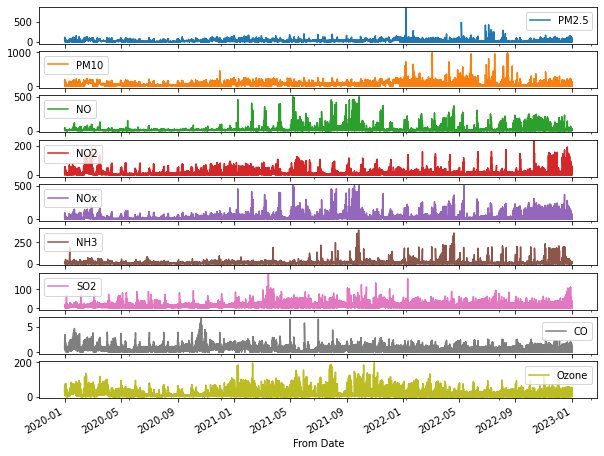

In [10]:
final_df.set_index('From Date')[['PM2.5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone']].plot(subplots=True)

In [11]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

final_df["PM2.5_SubIndex"] = final_df['PM2.5'].apply(lambda x: get_PM25_subindex(x))

In [12]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

final_df["PM10_SubIndex"] = final_df["PM10"].apply(lambda x: get_PM10_subindex(x))

In [13]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

final_df["SO2_SubIndex"] = final_df["SO2"].apply(lambda x: get_SO2_subindex(x))

In [14]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

final_df["NOx_SubIndex"] = final_df["NOx"].apply(lambda x: get_NOx_subindex(x))

In [15]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

final_df["CO_SubIndex"] = final_df["CO"].apply(lambda x: get_CO_subindex(x))

In [16]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

final_df["Ozone_SubIndex"] = final_df["Ozone"].apply(lambda x: get_O3_subindex(x))

In [17]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

final_df["NH3_SubIndex"] = final_df['NH3'].apply(lambda x: get_PM25_subindex(x))

In [18]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

final_df["Checks"] = (final_df["PM2.5_SubIndex"] > 0).astype(int) + \
                (final_df["PM10_SubIndex"] > 0).astype(int) + \
                (final_df["SO2_SubIndex"] > 0).astype(int) + \
                (final_df["NOx_SubIndex"] > 0).astype(int) + \
                (final_df["CO_SubIndex"] > 0).astype(int) + \
                (final_df["NH3_SubIndex"] > 0).astype(int) + \
                (final_df["Ozone_SubIndex"] > 0).astype(int)

final_df["AQI_calculated"] = round(final_df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                  "CO_SubIndex", "Ozone_SubIndex","NH3_SubIndex"]].max(axis = 1))

final_df.loc[final_df["PM2.5_SubIndex"] + final_df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
final_df.loc[final_df.Checks < 3, "AQI_calculated"] = np.NaN


final_df["AQI_bucket_calculated"] = final_df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
final_df[~final_df.AQI_calculated.isna()].head(10)

,From Date,Station,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,Ozone_SubIndex,NH3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,2020-01-01,bandra,54.66,129.15,33.13,33.83,66.98,0.0,12.36,2.55,...,91.100000,119.433333,15.4500,83.7250,106.875,35.38,0.0,6,119.0,Moderate
1,2020-02-01,bandra,60.25,117.23,17.77,28.03,45.81,0.0,14.10,2.38,...,100.833333,111.486667,17.6250,57.2625,104.750,23.03,0.0,6,111.0,Moderate
2,2020-03-01,bandra,55.67,100.72,21.19,25.70,46.89,0.0,13.20,2.22,...,92.783333,100.480000,16.5000,58.6125,102.750,33.10,0.0,6,103.0,Moderate
3,2020-04-01,bandra,31.42,49.30,16.71,23.64,40.35,0.0,4.21,2.03,...,52.366667,49.300000,5.2625,50.4375,100.375,36.92,0.0,6,100.0,Satisfactory
4,2020-05-01,bandra,44.59,62.40,25.56,30.41,55.98,0.0,3.90,2.43,...,74.316667,62.400000,4.8750,69.9750,105.375,27.56,0.0,6,105.0,Moderate
5,2020-06-01,bandra,44.49,75.68,24.34,34.11,58.45,0.0,7.70,2.50,...,74.150000,75.680000,9.6250,73.0625,106.250,27.52,0.0,6,106.0,Moderate
6,2020-07-01,bandra,52.25,102.83,32.95,33.54,66.49,0.0,11.63,2.74,...,87.083333,101.886667,14.5375,83.1125,109.250,25.74,0.0,6,109.0,Moderate
7,2020-08-01,bandra,42.44,80.04,15.43,29.75,45.19,0.0,20.26,2.24,...,70.733333,80.040000,25.3250,56.4875,103.000,32.54,0.0,6,103.0,Moderate
8,2020-09-01,bandra,42.42,85.09,15.13,37.41,51.83,0.0,21.21,2.44,...,70.700000,85.090000,26.5125,64.7875,105.500,33.93,0.0,6,106.0,Moderate
9,2020-10-01,bandra,51.17,106.16,18.92,42.38,60.65,0.0,28.22,2.62,...,85.283333,104.106667,35.2750,75.8125,107.750,30.83,0.0,6,108.0,Moderate


In [19]:
final_df.columns.get_loc("TOT-RF")

23

In [20]:
final_df.columns.get_loc("PM2.5")

2

In [21]:
final_df.drop(final_df.iloc[:, 2:24], inplace=True, axis=1)

In [22]:
final_df.drop(['AQI_bucket_calculated','Checks'],axis=1,inplace=True)

In [23]:
final_df.isnull().sum()

From Date           0
Station             0
PM2.5_SubIndex      0
PM10_SubIndex       0
SO2_SubIndex        0
NOx_SubIndex        0
CO_SubIndex         0
Ozone_SubIndex      0
NH3_SubIndex        0
AQI_calculated    735
dtype: int64

In [24]:
final_df[final_df.AQI_calculated.isna()].head()

,From Date,Station,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,Ozone_SubIndex,NH3_SubIndex,AQI_calculated
14,2020-01-15,bandra,0.0,0.0,23.6000,43.7125,101.625,33.96,0.0,NaN
15,2020-01-16,bandra,0.0,0.0,18.3375,51.9375,103.500,28.29,0.0,NaN
16,2020-01-17,bandra,0.0,0.0,12.1750,52.5625,105.000,31.04,0.0,NaN
17,2020-01-18,bandra,0.0,0.0,14.3750,71.3750,110.500,31.39,0.0,NaN
18,2020-01-19,bandra,0.0,0.0,20.7625,58.0125,111.250,34.83,0.0,NaN


In [25]:
final_df['AQI_calculated'] = final_df['AQI_calculated'].fillna(0) 

In [26]:
final_df.isnull().sum()

From Date         0
Station           0
PM2.5_SubIndex    0
PM10_SubIndex     0
SO2_SubIndex      0
NOx_SubIndex      0
CO_SubIndex       0
Ozone_SubIndex    0
NH3_SubIndex      0
AQI_calculated    0
dtype: int64

In [27]:
final_df = final_df[final_df.AQI_calculated != 0]

In [28]:
final_df.shape

(5847, 10)

In [29]:
final_df.head()

,From Date,Station,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,Ozone_SubIndex,NH3_SubIndex,AQI_calculated
0,2020-01-01,bandra,91.100000,119.433333,15.4500,83.7250,106.875,35.38,0.0,119.0
1,2020-02-01,bandra,100.833333,111.486667,17.6250,57.2625,104.750,23.03,0.0,111.0
2,2020-03-01,bandra,92.783333,100.480000,16.5000,58.6125,102.750,33.10,0.0,103.0
3,2020-04-01,bandra,52.366667,49.300000,5.2625,50.4375,100.375,36.92,0.0,100.0
4,2020-05-01,bandra,74.316667,62.400000,4.8750,69.9750,105.375,27.56,0.0,105.0


In [30]:
df_input = final_df[['PM2.5_SubIndex','PM10_SubIndex','SO2_SubIndex','NOx_SubIndex','CO_SubIndex','Ozone_SubIndex','NH3_SubIndex','AQI_calculated']]

In [31]:
df_input.describe()

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,Ozone_SubIndex,NH3_SubIndex,AQI_calculated
count,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000
mean,77.043342,82.928614,18.525523,43.268970,35.194672,20.246390,22.902252,113.438344
std,73.683125,66.242974,17.927915,53.001961,25.694131,24.863309,45.490503,87.364745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,23.800000,39.335000,5.706250,13.031250,16.000000,4.080000,4.683333,54.000000
50%,52.333333,75.800000,12.975000,25.250000,30.500000,11.530000,13.566667,94.000000
75%,102.183333,114.636667,26.062500,53.125000,50.000000,26.875000,25.633333,143.000000
max,849.076923,1093.750000,133.366667,481.983333,156.625000,266.375000,509.353846,1094.000000


In [32]:
df_input.query('PM10_SubIndex > 500').count()

PM2.5_SubIndex    21
PM10_SubIndex     21
SO2_SubIndex      21
NOx_SubIndex      21
CO_SubIndex       21
Ozone_SubIndex    21
NH3_SubIndex      21
AQI_calculated    21
dtype: int64

In [33]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5847 entries, 0 to 6581
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PM2.5_SubIndex  5847 non-null   float64
 1   PM10_SubIndex   5847 non-null   float64
 2   SO2_SubIndex    5847 non-null   float64
 3   NOx_SubIndex    5847 non-null   float64
 4   CO_SubIndex     5847 non-null   float64
 5   Ozone_SubIndex  5847 non-null   float64
 6   NH3_SubIndex    5847 non-null   float64
 7   AQI_calculated  5847 non-null   float64
dtypes: float64(8)
memory usage: 411.1 KB


In [34]:
test = df_input.iloc[:-4677]
train = df_input.iloc[-4677:]

In [35]:
train

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,Ozone_SubIndex,NH3_SubIndex,AQI_calculated
1653,38.816667,48.960000,8.4625,57.6375,57.5,21.55,19.066667,58.0
1654,30.983333,55.260000,8.2875,35.0625,44.5,39.43,12.433333,55.0
1655,24.583333,35.580000,8.3375,35.3500,33.0,16.40,9.016667,36.0
1656,29.183333,43.790000,8.1875,44.6625,28.0,28.85,11.816667,45.0
1657,28.683333,37.200000,6.8500,40.6375,32.0,21.34,11.733333,41.0
...,...,...,...,...,...,...,...,...
6577,126.166667,154.373333,34.6375,37.7000,69.0,4.00,20.083333,154.0
6578,149.533333,169.986667,27.8500,73.3875,79.0,4.06,21.666667,170.0
6579,135.966667,159.580000,27.1375,46.0750,64.5,4.04,21.800000,160.0
6580,87.383333,122.166667,24.0500,17.8000,53.5,3.92,26.683333,122.0


In [36]:
test

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,Ozone_SubIndex,NH3_SubIndex,AQI_calculated
0,91.100000,119.433333,15.4500,83.7250,106.875,35.38,0.000000,119.0
1,100.833333,111.486667,17.6250,57.2625,104.750,23.03,0.000000,111.0
2,92.783333,100.480000,16.5000,58.6125,102.750,33.10,0.000000,103.0
3,52.366667,49.300000,5.2625,50.4375,100.375,36.92,0.000000,100.0
4,74.316667,62.400000,4.8750,69.9750,105.375,27.56,0.000000,105.0
...,...,...,...,...,...,...,...,...
1648,33.583333,94.010000,6.4000,16.3375,18.000,10.04,14.833333,94.0
1649,36.783333,100.246667,6.7125,18.7250,18.000,9.04,14.300000,100.0
1650,37.516667,95.410000,7.0000,31.9375,15.000,8.02,20.583333,95.0
1651,41.650000,79.210000,7.7000,46.1875,21.500,7.50,21.566667,79.0


In [37]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [38]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [39]:
win_length = 31
batch_size = 3
num_features = 8
train_generator = TimeseriesGenerator(scaled_train,scaled_train, length = win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(scaled_test,scaled_test, length = win_length,sampling_rate=1,batch_size=batch_size)

In [40]:
len(scaled_train)

4677

In [41]:
len(train_generator) 

1549

In [42]:
X,y = train_generator[0]

In [43]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.04571631 0.04476343 0.06345289 0.11958401 0.50493963 0.14200988
 0.03743305 0.03985171 0.03649061 0.05052343 0.06214071 0.07274629
 0.39077936 0.25983526 0.02441001 0.03707136 0.02895301 0.03253029
 0.06251562 0.07334279 0.28979144 0.10807249 0.01770217 0.01946247
 0.03437066 0.04003657 0.0613909  0.09266399 0.24588364 0.19011532
 0.02319933 0.02780352 0.03378178 0.03401143 0.05136216 0.08431308
 0.28100988 0.14062603 0.02303572 0.02409639 0.02879598 0.03264
 0.04086478 0.05529237 0.18880351 0.33133443 0.03419365 0.03243744
 0.34602283 0.03794286 0.06092227 0.09253432 0.16684962 0.26728171
 0.0481656  0.25857275 0.02337833 0.02748343 0.05623594 0.06138698
 0.16245884 0.38102142 0.04967077 0.03985171 0.03847315 0.05155657
 0.05492377 0.05114285 0.13611416 0.55782537 0.03887278 0.06487488
 0.03405659 0.04795429 0.0550175  0.04901622 0.12294182 0.35558484
 0.02918731 0.03614458 0.04088754 0.06317714 0.05426768 0.07098274
 0.21075741 0.27512356 0.03982169 0.05004634 0.

In [44]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape = (win_length,num_features),return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences = False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(scaled_train.shape[1]))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 31, 128)           70144     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 31, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 31, 128)           131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 31, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [46]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 2,mode = 'min')

validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=win_length, batch_size=batch_size)

model.compile(loss = tf.losses.MeanSquaredError(),optimizer = tf.optimizers.Adam(),metrics = [tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator,epochs=20,validation_data = validation_generator, shuffle = False, callbacks = [early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1549/1549 [==============================] - 26s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0628 - val_loss: 0.0316 - val_mean_absolute_error: 0.1194
Epoch 2/20
1549/1549 [==============================] - 28s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0621 - val_loss: 0.0287 - val_mean_absolute_error: 0.1243
Epoch 3/20
1549/1549 [==============================] - 25s 16ms/step - loss: 0.0090 - mean_absolute_error: 0.0597 - val_loss: 0.0218 - val_mean_absolute_error: 0.1014
Epoch 4/20
1549/1549 [==============================] - 26s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0546 - val_loss: 0.0195 - val_mean_absolute_error: 0.0965
Epoch 5/20
1549/1549 [==============================] - 25s 16ms/step - loss: 0.0066 - mean_absolute_error: 0.0506 - val_loss: 0.0179 - val_mean_absolute_error: 0.0930
Epoch 6/20
1549/1549 [==============================] - 25s 16ms/step - loss: 0.0058

In [47]:
model.evaluate(test_generator,verbose=0)

[0.009769555181264877, 0.058065447956323624]

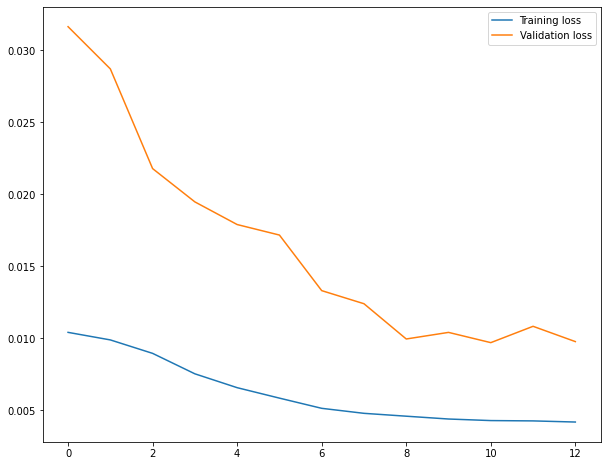

In [48]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [49]:
#holding my predictions
test_predictions = []

first_eval_batch = scaled_train[-win_length:]
current_batch = first_eval_batch.reshape((1,win_length,num_features))

for i in range(win_length):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    new_input = np.append(current_batch[:,1:,:],[[current_pred]] , axis=1)
    current_batch = new_input

In [50]:
current_pred.shape

(8,)

In [51]:
true_predictions = scaler.inverse_transform(test_predictions)

In [52]:
df_input.tail(10)

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,Ozone_SubIndex,NH3_SubIndex,AQI_calculated
6572,98.666667,128.480000,31.6875,38.2000,57.5,4.07,31.600000,128.0
6573,76.916667,115.520000,33.0125,36.9750,47.5,4.04,29.416667,116.0
6574,88.600000,131.386667,39.8500,46.4625,61.5,4.08,28.516667,131.0
6575,107.433333,137.846667,33.3000,29.6750,59.5,4.09,26.483333,138.0
6576,126.766667,154.920000,26.5750,22.6000,65.5,4.05,25.050000,155.0
6577,126.166667,154.373333,34.6375,37.7000,69.0,4.00,20.083333,154.0
6578,149.533333,169.986667,27.8500,73.3875,79.0,4.06,21.666667,170.0
6579,135.966667,159.580000,27.1375,46.0750,64.5,4.04,21.800000,160.0
6580,87.383333,122.166667,24.0500,17.8000,53.5,3.92,26.683333,122.0
6581,68.916667,113.926667,28.4500,25.5000,49.5,3.93,29.066667,114.0


In [53]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)
true_predictions

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,Ozone_SubIndex,NH3_SubIndex,AQI_calculated
0,98.419822,103.565047,25.771858,36.307368,48.402598,6.829172,65.684563,155.400487
1,121.913809,122.874201,22.244126,38.659359,48.950497,7.059803,87.051807,190.039385
2,142.391206,139.023829,19.549827,35.094884,50.163963,6.667224,107.403194,217.753577
3,160.055999,152.763687,18.081102,27.582080,52.150759,5.909330,127.988937,240.791558
4,173.930627,164.107946,17.670725,18.784597,55.288961,4.756243,152.864329,262.656221
5,182.409558,171.988881,18.061495,9.902142,60.050706,3.220750,183.077243,283.483203
6,186.072810,176.569801,18.915199,1.617081,66.751271,1.495994,216.567214,302.978608
7,186.614224,178.534868,19.858790,-5.543125,75.342190,-0.020987,247.809949,319.582658
8,186.077212,178.892368,20.726143,-11.367702,85.295763,-1.076859,269.274184,330.712802
9,186.279041,178.926676,21.454912,-15.923639,95.436712,-1.527384,275.176778,334.236437


In [54]:
import datetime
start_date = datetime.date(2023,1,2)
end_date = start_date + datetime.timedelta(days=win_length-1)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
ndf = pd.DataFrame({'Dates':date_range})
fin = pd.concat([ndf,true_predictions],axis=1)
fin

,Dates,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,Ozone_SubIndex,NH3_SubIndex,AQI_calculated
0,2023-01-02,98.419822,103.565047,25.771858,36.307368,48.402598,6.829172,65.684563,155.400487
1,2023-01-03,121.913809,122.874201,22.244126,38.659359,48.950497,7.059803,87.051807,190.039385
2,2023-01-04,142.391206,139.023829,19.549827,35.094884,50.163963,6.667224,107.403194,217.753577
3,2023-01-05,160.055999,152.763687,18.081102,27.582080,52.150759,5.909330,127.988937,240.791558
4,2023-01-06,173.930627,164.107946,17.670725,18.784597,55.288961,4.756243,152.864329,262.656221
5,2023-01-07,182.409558,171.988881,18.061495,9.902142,60.050706,3.220750,183.077243,283.483203
6,2023-01-08,186.072810,176.569801,18.915199,1.617081,66.751271,1.495994,216.567214,302.978608
7,2023-01-09,186.614224,178.534868,19.858790,-5.543125,75.342190,-0.020987,247.809949,319.582658
8,2023-01-10,186.077212,178.892368,20.726143,-11.367702,85.295763,-1.076859,269.274184,330.712802
9,2023-01-11,186.279041,178.926676,21.454912,-15.923639,95.436712,-1.527384,275.176778,334.236437


C:\ProgramData\Anaconda3\envs\gpu2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='From Date', ylabel='AQI_calculated'>

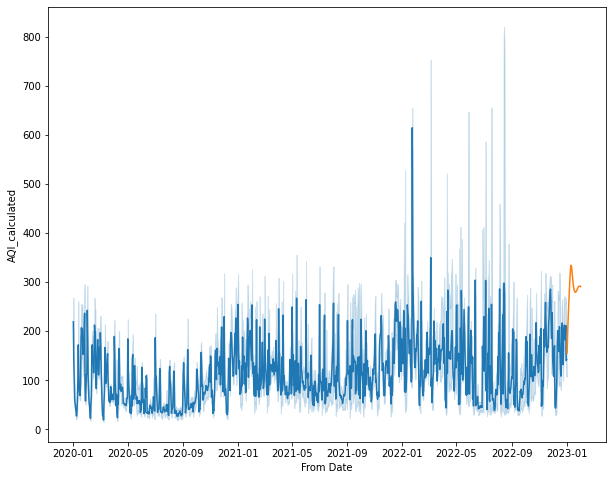

In [62]:
import seaborn as sns
original = final_df[['From Date', 'AQI_calculated']]
original['From Date']=pd.to_datetime(original['From Date'])
# original = original.loc[original['From Date'] >= '2022-10-1']

sns.lineplot(x=original['From Date'], y=original['AQI_calculated'])
sns.lineplot(x=fin['Dates'], y=fin['AQI_calculated'])
# plt.xticks(rotation=25)

In [61]:
from tensorflow.keras.models import load_model
model.save("multivariate_v4.h5")

C:\ProgramData\Anaconda3\envs\gpu2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='From Date', ylabel='AQI_calculated'>

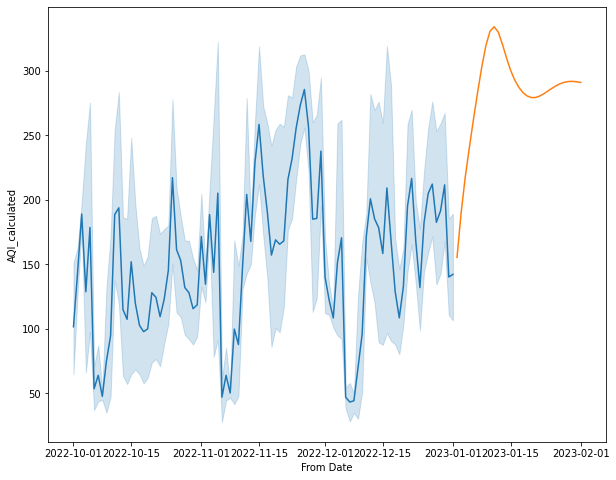

In [63]:
import seaborn as sns
original = final_df[['From Date', 'AQI_calculated']]
original['From Date']=pd.to_datetime(original['From Date'])
original = original.loc[original['From Date'] >= '2022-10-1']

sns.lineplot(x=original['From Date'], y=original['AQI_calculated'])
sns.lineplot(x=fin['Dates'], y=fin['AQI_calculated'])
# plt.xticks(rotation=25)

In [77]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [78]:
data_scaled

array([[0.10729299, 0.10919619, 0.11584604, ..., 0.13282027, 0.        ,
        0.09638554],
       [0.11875642, 0.10193067, 0.13215446, ..., 0.08645706, 0.        ,
        0.08897127],
       [0.10927553, 0.09186743, 0.12371907, ..., 0.12426091, 0.        ,
        0.081557  ],
       ...,
       [0.16013469, 0.14590171, 0.20348038, ..., 0.01516659, 0.04279932,
        0.13438369],
       [0.10291569, 0.11169524, 0.18032992, ..., 0.0147161 , 0.05238663,
        0.09916589],
       [0.08116658, 0.10416152, 0.21332167, ..., 0.01475364, 0.05706576,
        0.09175162]])

In [79]:
features=data_scaled
target=data_scaled[:,0]

In [80]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20//
                                                    , random_state=123, shuffle = False)

In [81]:
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, //
                                     sampling_rate=1, batch_size=batch_size)

In [82]:
predictions=model.predict(test_generator)

In [94]:
y_pred=model.predict(test_generator)

In [83]:
predictions

array([[0.03805809, 0.04694447, 0.10631727, ..., 0.04465963, 0.04468501,
        0.07987114],
       [0.04683848, 0.05221182, 0.10575655, ..., 0.05383015, 0.04233081,
        0.08411859],
       [0.0538943 , 0.0568286 , 0.11042325, ..., 0.05616301, 0.04446436,
        0.08950014],
       ...,
       [0.17077595, 0.12494147, 0.19635096, ..., 0.03924154, 0.11788815,
        0.1692775 ],
       [0.14943424, 0.11258846, 0.18612343, ..., 0.03872918, 0.10974915,
        0.15047695],
       [0.12177587, 0.09659477, 0.1772939 , ..., 0.03567231, 0.11817107,
        0.13151164]], dtype=float32)

In [95]:
y_pred.shape

(1139, 8)

In [84]:
y_test

array([0.0457752 , 0.03252552, 0.02027692, ..., 0.16013469, 0.10291569,
       0.08116658])

In [85]:
x_test

array([[0.0457752 , 0.03328   , 0.03411647, ..., 0.06321915, 0.01001269,
        0.02224282],
       [0.03252552, 0.02402743, 0.03439765, ..., 0.03712811, 0.00991452,
        0.01204819],
       [0.02027692, 0.02174171, 0.03064859, ..., 0.03232285, 0.00752587,
        0.01112141],
       ...,
       [0.16013469, 0.14590171, 0.20348038, ..., 0.01516659, 0.04279932,
        0.13438369],
       [0.10291569, 0.11169524, 0.18032992, ..., 0.0147161 , 0.05238663,
        0.09916589],
       [0.08116658, 0.10416152, 0.21332167, ..., 0.01475364, 0.05706576,
        0.09175162]])

In [86]:
x_test[:,1:][win_length:]

array([[0.03602286, 0.15136841, 0.06460286, ..., 0.06179259, 0.03474991,
        0.02224282],
       [0.03989943, 0.15624219, 0.07160517, ..., 0.06877522, 0.03474991,
        0.03151066],
       [0.02733714, 0.16317796, 0.07948926, ..., 0.04857813, 0.03367011,
        0.02131603],
       ...,
       [0.14590171, 0.20348038, 0.09559459, ..., 0.01516659, 0.04279932,
        0.13438369],
       [0.11169524, 0.18032992, 0.03693074, ..., 0.0147161 , 0.05238663,
        0.09916589],
       [0.10416152, 0.21332167, 0.05290639, ..., 0.01475364, 0.05706576,
        0.09175162]])

In [87]:
# df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [96]:
df_pred = pd.DataFrame(predictions)

In [98]:
df_pred

,0,1,2,3,4,5,6,7
0,0.038058,0.046944,0.106317,0.112571,0.156576,0.044660,0.044685,0.079871
1,0.046838,0.052212,0.105757,0.111647,0.156518,0.053830,0.042331,0.084119
2,0.053894,0.056829,0.110423,0.112985,0.153888,0.056163,0.044464,0.089500
3,0.037261,0.047434,0.118973,0.117143,0.142535,0.043902,0.043884,0.080586
4,0.046165,0.051646,0.103223,0.123271,0.170896,0.049483,0.041003,0.086595
...,...,...,...,...,...,...,...,...
1134,0.164319,0.121232,0.192010,0.078878,0.398662,0.049706,0.114460,0.157896
1135,0.150707,0.114420,0.233428,0.082379,0.406851,0.045146,0.112475,0.148687
1136,0.170776,0.124941,0.196351,0.105155,0.450970,0.039242,0.117888,0.169278
1137,0.149434,0.112588,0.186123,0.092770,0.381471,0.038729,0.109749,0.150477


In [99]:
df_input

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,Ozone_SubIndex,NH3_SubIndex,AQI_calculated
0,91.100000,119.433333,15.4500,83.7250,106.875,35.38,0.000000,119.0
1,100.833333,111.486667,17.6250,57.2625,104.750,23.03,0.000000,111.0
2,92.783333,100.480000,16.5000,58.6125,102.750,33.10,0.000000,103.0
3,52.366667,49.300000,5.2625,50.4375,100.375,36.92,0.000000,100.0
4,74.316667,62.400000,4.8750,69.9750,105.375,27.56,0.000000,105.0
...,...,...,...,...,...,...,...,...
6577,126.166667,154.373333,34.6375,37.7000,69.000,4.00,20.083333,154.0
6578,149.533333,169.986667,27.8500,73.3875,79.000,4.06,21.666667,170.0
6579,135.966667,159.580000,27.1375,46.0750,64.500,4.04,21.800000,160.0
6580,87.383333,122.166667,24.0500,17.8000,53.500,3.92,26.683333,122.0


In [100]:
rev_trans=scaler.inverse_transform(df_pred)

In [101]:
rev_trans

array([[ 32.31425 ,  51.34551 ,  14.17918 , ...,  11.89621 ,  22.760479,
        101.18096 ],
       [ 39.769474,  57.106678,  14.104399, ...,  14.339006,  21.56136 ,
        105.76396 ],
       [ 45.760406,  62.156284,  14.726781, ...,  14.960422,  22.648092,
        111.570656],
       ...,
       [145.00192 , 136.65472 ,  26.186674, ...,  10.452965,  60.046783,
        197.65042 ],
       [126.881165, 123.14362 ,  24.822662, ...,  10.316485,  55.901154,
        177.36462 ],
       [103.39708 , 105.65053 ,  23.645096, ...,   9.502213,  60.190887,
        156.90106 ]], dtype=float32)

In [102]:
df_final=df_input[predictions.shape[0]*-1:]

In [103]:
df_final.count()

PM2.5_SubIndex    1139
PM10_SubIndex     1139
SO2_SubIndex      1139
NOx_SubIndex      1139
CO_SubIndex       1139
Ozone_SubIndex    1139
NH3_SubIndex      1139
AQI_calculated    1139
dtype: int64

In [104]:
df_final['Aqi_Pred']=rev_trans[:,0]

C:\ProgramData\Anaconda3\envs\gpu2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:

df_final

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,Ozone_SubIndex,NH3_SubIndex,AQI_calculated,Aqi_Pred
5395,37.600000,39.400000,20.1875,31.1375,20.5,16.46,17.700000,39.0,32.314251
5396,48.816667,43.640000,20.8375,34.5125,20.5,18.32,17.700000,49.0,39.769474
5397,28.083333,29.900000,21.7625,38.3125,18.5,12.94,17.150000,38.0,45.760406
5398,39.233333,25.440000,19.8250,43.2375,24.5,15.87,17.016667,43.0,31.637852
5399,31.600000,25.710000,20.0375,43.6500,24.0,21.35,17.066667,44.0,39.197372
...,...,...,...,...,...,...,...,...,...
6577,126.166667,154.373333,34.6375,37.7000,69.0,4.00,20.083333,154.0,139.519730
6578,149.533333,169.986667,27.8500,73.3875,79.0,4.06,21.666667,170.0,127.961472
6579,135.966667,159.580000,27.1375,46.0750,64.5,4.04,21.800000,160.0,145.001923
6580,87.383333,122.166667,24.0500,17.8000,53.5,3.92,26.683333,122.0,126.881165


<AxesSubplot:>

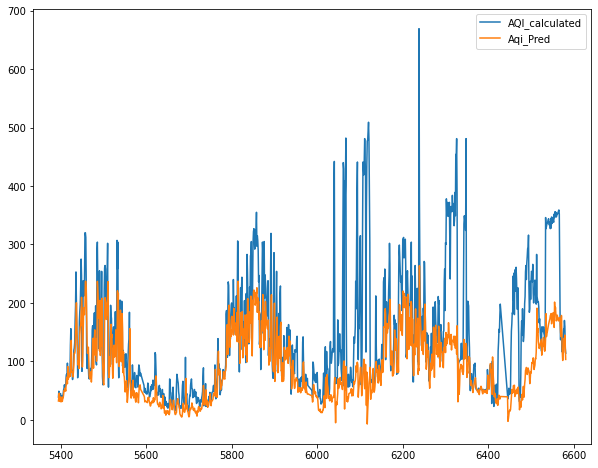

In [107]:
df_final[['AQI_calculated','Aqi_Pred']].plot()